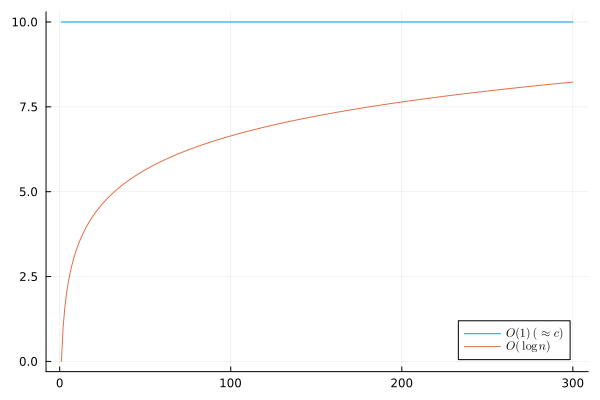

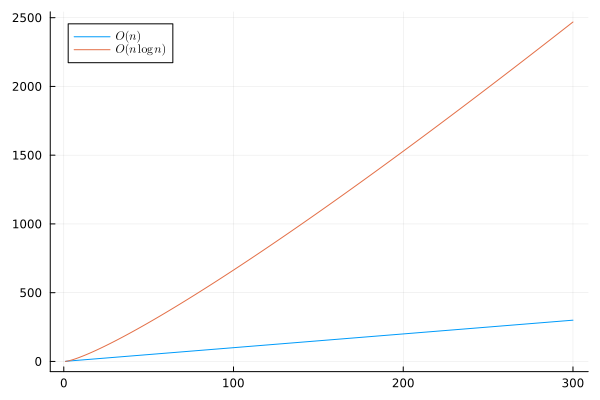

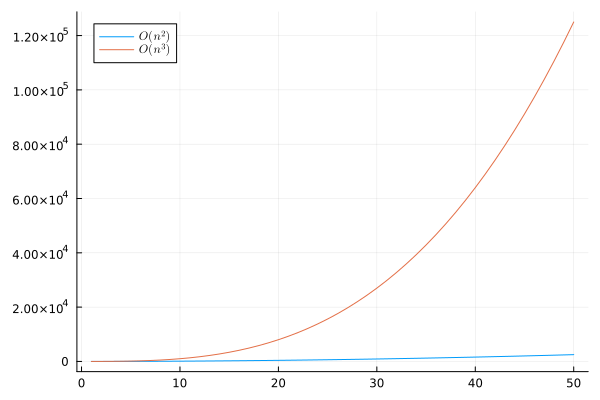

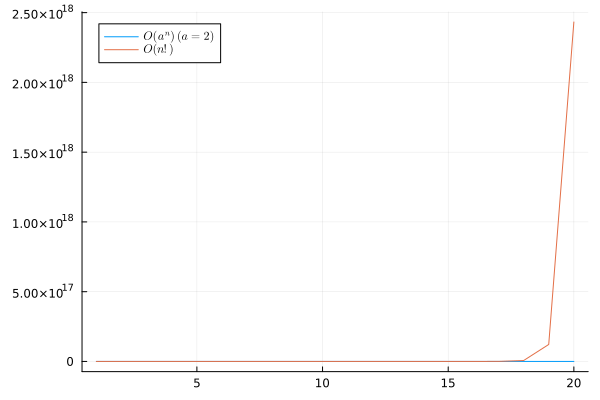

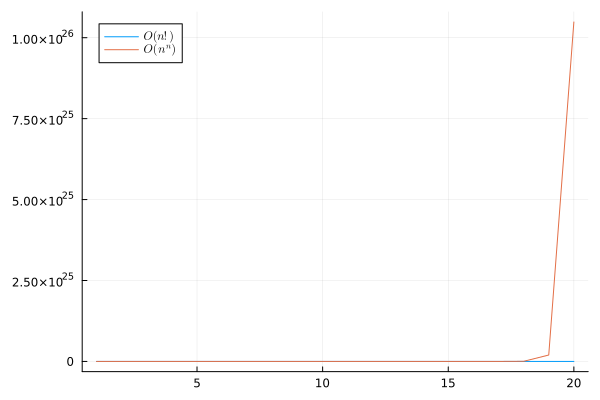

In [ ]:
using Plots, LaTeXStrings

pow_big(n::Int) = BigInt(n)^BigInt(n)

n = 300
plot(1:n, fill(10, n), label=L"O(1)\;(\approx c)")
plot!(1:n, log2.(1:n), label=L"O(\log n)")
display(current())

n = 300
plot(1:n, 1:n, label=L"O(n)")
plot!(1:n, (1:n) .* log2.(1:n), label=L"O(n\log n)")
display(current())

n = 50
plot(1:n, (1:n).^2, label=L"O(n^2)")
plot!(1:n, (1:n).^3, label=L"O(n^3)")
display(current())


a = 2
n = 20
plot(1:n, a .^ (1:n), label=L"O(a^n)\;(a=2)")
plot!(1:n, factorial.(1:n), label=L"O(n!)")
display(current())

n = 20
plot(1:n, factorial.(1:n), label=L"O(n!)")
plot!(1:n, [pow_big(k) for k in 1:n], label=L"O(n^n)")
display(current())


In [ ]:

orders = [
    ("O(1)"      , n -> 1),
    ("O(log n)"  , n -> log2(n)),
    ("O(sqrt n)" , n -> sqrt(n)),
    ("O(n^2)"    , n -> n^2),
    ("O(2^n)"    , n -> 2.0^n),
    ("O(n!)"     , n -> factorial(big(n))),
    ("O(n^n)"    , n -> big(n)^big(n)),
    ("O(n^(n^n))", n -> (big(n))^(big(n)^big(n)))
]


ns_by_order = Dict(
    "O(1)"       => [10, 100, 1000, 10000],
    "O(log n)"   => [10, 100, 1000, 10000],
    "O(sqrt n)"  => [10, 100, 1000, 10000],
    "O(n^2)"     => [10, 100, 1000, 10000],
    "O(2^n)"     => [10, 20, 30, 50],     
    "O(n!)"      => [5, 10, 20, 50],      
    "O(n^n)"     => [5, 10, 20, 50],      # 50^50 es enorme
    "O(n^(n^n))" => [2, 3, 4, 5]          
)


function safe_ops_string(f, n; max_digits=40)
    try
        v = f(n)

        if v isa BigInt
            s = string(v)
            if length(s) > max_digits
                return "MUY GRANDE (" * string(length(s)) * " dígitos)"
            else
                return s
            end
        end

        if v isa AbstractFloat
            if !isfinite(v)
                return "MUY GRANDE"
            end
            return string(v)
        end

        return string(v)
    catch
        return "MUY GRANDE"
    end
end


function safe_time_string(f, n)
    try
        ops = f(n)

        if ops isa AbstractFloat
            if !isfinite(ops)
                return "MUY GRANDE"
            end
            seconds = ops * 1e-9
            years = seconds / (60*60*24*365)
            return "≈ " * string(seconds) * " s (" * string(years) * " años)"
        end

        if ops isa Integer

            ops_float = float(ops)
            if !isfinite(ops_float)

                digs = length(string(ops))
        
                log10_years = (digs - 1) - 9 - 7.5
                return "MUY GRANDE (≈ 10^" * string(round(log10_years, digits=1)) * " años)"
            else
                seconds = ops_float * 1e-9
                years = seconds / (60*60*24*365)
                return "≈ " * string(seconds) * " s (" * string(years) * " años)"
            end
        end

        return "MUY GRANDE"
    catch
        return "MUY GRANDE"
    end
end

println("Supuesto: 1 operación = 1 ns\n")

for (name, fops) in orders
    ns = ns_by_order[name]

    println("==== ", name, " ====")
    println(rpad("n", 10), " | ", rpad("Operaciones", 30), " | Tiempo aprox")
    println(repeat("-", 10), "-+-", repeat("-", 30), "-+-", repeat("-", 30))

    for n in ns
        ops_str  = safe_ops_string(fops, n)
        time_str = safe_time_string(fops, n)
        println(rpad(string(n), 10), " | ", rpad(ops_str, 30), " | ", time_str)
    end

    println()
end


Supuesto: 1 operación = 1 ns

==== O(1) ====
n          | Operaciones                    | Tiempo aprox
-----------+--------------------------------+-------------------------------
10         | 1                              | ≈ 1.0e-9 s (3.170979198376459e-17 años)
100        | 1                              | ≈ 1.0e-9 s (3.170979198376459e-17 años)
1000       | 1                              | ≈ 1.0e-9 s (3.170979198376459e-17 años)
10000      | 1                              | ≈ 1.0e-9 s (3.170979198376459e-17 años)

==== O(log n) ====
n          | Operaciones                    | Tiempo aprox
-----------+--------------------------------+-------------------------------
10         | 3.321928094887362              | ≈ 3.3219280948873622e-9 s (1.0533764887390164e-16 años)
100        | 6.643856189774724              | ≈ 6.6438561897747244e-9 s (2.1067529774780329e-16 años)
1000       | 9.965784284662087              | ≈ 9.965784284662088e-9 s (3.16012946621705e-16 años)
10000      | 13.